# Análise exploratória de dados

## Bibliotecas e base de dados

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
pd.set_option('display.float_format', '{:,.2f}'.format)
!pip install sidrapy
import sidrapy
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_theme(style="whitegrid", palette="deep")
plt.rcParams['figure.figsize'] = (12, 6)

import warnings
warnings.filterwarnings('ignore')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
object_columns = ['Protocolo_S2iD', 'Nome_Municipio', 'Sigla_UF', 'regiao',
                  'Setores Censitários', 'Status', 'DH_Descricao', 'DM_Descricao',
                  'DA_Descricao', 'DA_Polui/cont da água', 'DA_Polui/cont do ar',
                  'DA_Polui/cont do solo', 'DA_Dimi/exauri hídrico',
                  "DA_Incêndi parques/APA's/APP's", 'PEPL_Descricao', 'PEPR_Descricao',
                  'Categoria', 'Grupo', 'Subgrupo', 'Tipo', 'Subtipo']

dtype = {col: 'object' for col in object_columns}

df_eventos = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Machine Learning/ProjetoFinal_BootcampML_Previsaodanosdesastres/0. Base de Dados/Por evento/df_eventos_desastres.csv',
                         sep=';',
                         decimal=',',
                         dtype=dtype,
                         low_memory=False)

## Análise inicial dos dados

In [ ]:
df_eventos.head(10)

,Protocolo_S2iD,Nome_Municipio,Sigla_UF,regiao,Data_Registro,Data_Evento,codigo_ibge,Setores Censitários,Status,DH_Descricao,...,Hab,Area,Ano,PIB,Categoria,Grupo,Subgrupo,Tipo,Subtipo,COBRADE
0,MG-F-3152501-12300-20141231,Pouso Alegre,MG,Sudeste,2015-01-01 00:00:00,2015-01-01,3152501,NaN,Registro,NaN,...,"152,217.00",542.80,"2,015.00","6,553,097.00",Natural,Hidrológico,Alagamentos,NaN,NaN,12300
1,RS-F-4305207-13215-20140101,Cerro Largo,RS,Sul,2015-01-02 00:00:00,2015-01-02,4305207,NaN,Registro,NaN,...,"13,705.00",176.64,"2,015.00","583,510.00",Natural,Meteorológico,Tempestades,Tempestade Local/Convectiva,Vendaval,13215
2,SC-F-4200903-12200-20141226,Angelina,SC,Sul,2015-01-02 00:00:00,2015-01-02,4200903,NaN,Reconhecido,Moradores da comunidade que ficarem desprovido...,...,"5,358.00",500.00,"2,015.00","103,375.00",Natural,Hidrológico,Enxurradas,NaN,NaN,12200
3,CE-F-2311702-13215-20141230,Reriutaba,CE,Nordeste,2015-01-03 00:00:00,2015-01-03,2311702,NaN,Registro,Desalojamento de uma família com quatro (04) p...,...,"18,606.00",372.95,"2,015.00","140,349.00",Natural,Meteorológico,Tempestades,Tempestade Local/Convectiva,Vendaval,13215
4,MS-F-5000708-12200-20141222,Anastácio,MS,Centro-oeste,2015-01-05 00:00:00,2015-01-05,5000708,NaN,Reconhecido,Ficaram prejudicados um total de 800 famílias ...,...,"24,114.00","2,913.18","2,015.00","394,893.00",Natural,Hidrológico,Enxurradas,NaN,NaN,12200
5,RS-F-4301925-12200-20150101,Barra do Rio Azul,RS,Sul,2015-01-06 00:00:00,2015-01-06,4301925,NaN,Não reconhecido,NaN,...,"1,696.00",147.00,"2,015.00","42,201.00",Natural,Hidrológico,Enxurradas,NaN,NaN,12200
6,SC-F-4207809-13215-20150101,Irani,SC,Sul,2015-01-06 00:00:00,2015-01-06,4207809,NaN,Registro,Aproximadamente 50 famílias tiveram suas resid...,...,"10,195.00",325.86,"2,015.00","190,921.00",Natural,Meteorológico,Tempestades,Tempestade Local/Convectiva,Vendaval,13215
7,SC-F-4208005-13215-20151001,Itá,SC,Sul,2015-01-06 00:00:00,2015-01-06,4208005,NaN,Registro,NaN,...,"7,067.00",166.26,"2,015.00","210,697.00",Natural,Meteorológico,Tempestades,Tempestade Local/Convectiva,Vendaval,13215
8,RS-F-4311601-12200-20141231,Liberato Salzano,RS,Sul,2015-01-07 00:00:00,2015-01-07,4311601,NaN,Reconhecido,NaN,...,"4,781.00",245.63,"2,015.00","116,822.00",Natural,Hidrológico,Enxurradas,NaN,NaN,12200
9,BA-F-2931608-12200-20141216,Teolândia,BA,Nordeste,2015-01-07 00:00:00,2015-01-07,2931608,NaN,Reconhecido,05 pessoas deram entrada no hospital municipal...,...,"15,332.00",289.78,"2,015.00","112,279.00",Natural,Hidrológico,Enxurradas,NaN,NaN,12200


In [ ]:
df_eventos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30224 entries, 0 to 30223
Data columns (total 77 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Protocolo_S2iD                  30224 non-null  object 
 1   Nome_Municipio                  30224 non-null  object 
 2   Sigla_UF                        30224 non-null  object 
 3   regiao                          30224 non-null  object 
 4   Data_Registro                   30224 non-null  object 
 5   Data_Evento                     30224 non-null  object 
 6   codigo_ibge                     30224 non-null  int64  
 7   Setores Censitários             21843 non-null  object 
 8   Status                          30224 non-null  object 
 9   DH_Descricao                    23144 non-null  object 
 10  DH_MORTOS                       30224 non-null  int64  
 11  DH_FERIDOS                      30224 non-null  int64  
 12  DH_ENFERMOS                     

In [ ]:
display(df_eventos.describe())

,codigo_ibge,DH_MORTOS,DH_FERIDOS,DH_ENFERMOS,DH_DESABRIGADOS,DH_DESALOJADOS,DH_DESAPARECIDOS,DH_OUTROS AFETADOS,DH_total_danos_humanos,DM_Uni Habita Danificadas,...,PEPR_Serviços (R$),PEPR_total_privado,PE_PLePR,Empenhado,DensidadePop,Hab,Area,Ano,PIB,COBRADE
count,"30,224.00","30,224.00","30,224.00","30,224.00","30,224.00","30,224.00","30,224.00","30,224.00","30,224.00","30,224.00",...,"30,224.00","30,224.00","30,224.00","6,030.00","30,224.00","30,224.00","30,224.00","20,088.00","20,088.00","30,224.00"
mean,"3,329,015.66",0.06,1.36,25.13,19.61,101.85,0.03,"5,476.24","5,624.28",46.41,...,"178,277.23","10,171,654.55","11,158,487.98","1,948,373.51",118.71,"58,088.74","2,655.11","2,018.34","2,293,351.19","13,604.55"
std,"1,019,509.11",1.64,39.35,417.04,271.57,931.28,2.39,"27,827.71","27,961.39",667.79,...,"5,741,739.98","98,235,670.97","99,447,377.15","6,184,099.42",542.02,"268,079.49","9,455.87",1.99,"17,256,153.22","1,615.45"
min,"1,100,015.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.15,"1,010.00",3.56,"2,015.00","11,679.00","11,110.00"
25%,"2,517,100.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,"145,742.35",10.97,"6,847.00",243.73,"2,017.00","99,106.25","13,214.00"
50%,"3,145,455.00",0.00,0.00,0.00,0.00,0.00,0.00,762.50,930.00,0.00,...,0.00,"9,670.37","208,521.19","450,706.14",24.30,"14,383.00",536.07,"2,018.00","239,914.00","13,215.00"
75%,"4,215,000.00",0.00,0.00,0.00,0.00,0.00,0.00,"4,907.00","5,014.00",0.00,...,0.00,"4,327,149.58","5,852,920.34","1,335,953.80",59.07,"33,663.00","1,480.64","2,020.00","778,640.00","14,110.00"
max,"5,300,108.00",242.00,"5,586.00","25,219.00","28,490.00","98,644.00",352.00,"2,100,000.00","2,100,000.00","45,000.00",...,"679,064,639.27","9,747,193,840.17","9,748,021,348.02","101,056,111.91","13,416.81","11,451,999.00","159,533.31","2,021.00","763,597,808.00","25,500.00"


In [ ]:
status_counts = df_eventos['Status'].value_counts()
print("\nDistribuição da variável 'Status':")
display(status_counts)


Distribuição da variável 'Status':


,count
Status,
Reconhecido,16483
Registro,11629
Não reconhecido,1863
Não homologado pelo estado,141
Homologado pelo estado,108


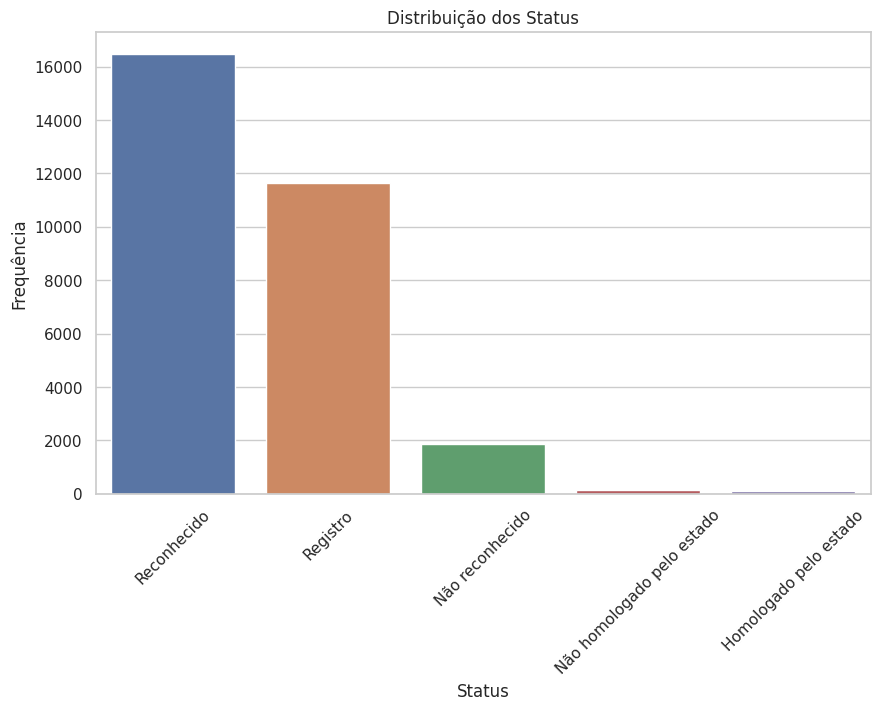

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Status', data=df_eventos, order=status_counts.index, palette = 'deep')
plt.title('Distribuição dos Status')
plt.xlabel('Status')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.show()

## Valores ausentes

In [ ]:
print("\nContagem de valores ausentes por coluna:")
missing_values = df_eventos.isnull().sum()
display(missing_values[missing_values > 0])


Contagem de valores ausentes por coluna:


,0
Setores Censitários,8381
DH_Descricao,7080
DM_Descricao,12903
DA_Descricao,12399
DA_Polui/cont da água,28998
DA_Polui/cont do ar,29930
DA_Polui/cont do solo,29664
DA_Dimi/exauri hídrico,28397
DA_Incêndi parques/APA's/APP's,28715
PEPL_Descricao,10705



Análise dos missing values em relação ao PIB:


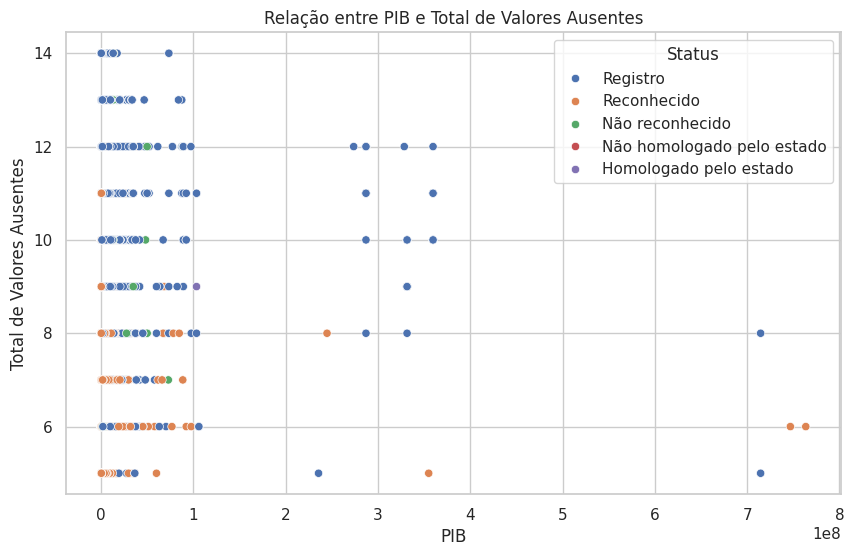

In [ ]:
# Análise dos missing values em relação ao PIB
print("\nAnálise dos missing values em relação ao PIB:")

# Selecionar as colunas com missing values
cols_with_missing = missing_values[missing_values > 0].index.tolist()

# Criar uma cópia do dataframe para análise
df_eventos_missing = df_eventos.copy()

# Criar uma variável indicando o número de missing values por linha
df_eventos_missing['Total_Missing'] = df_eventos_missing[cols_with_missing].isnull().sum(axis=1)

# Scatter plot de PIB vs Total de Missing Values
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PIB', y='Total_Missing', data=df_eventos_missing, hue='Status', palette='deep')
plt.title('Relação entre PIB e Total de Valores Ausentes')
plt.xlabel('PIB')
plt.ylabel('Total de Valores Ausentes')
plt.show()

In [ ]:
correlation = df_eventos_missing['PIB'].corr(df_eventos_missing['Total_Missing'])
print(f"\nCorrelação entre PIB e Total de Valores Ausentes: {correlation:.2f}")


Correlação entre PIB e Total de Valores Ausentes: 0.03


##PIB x Status

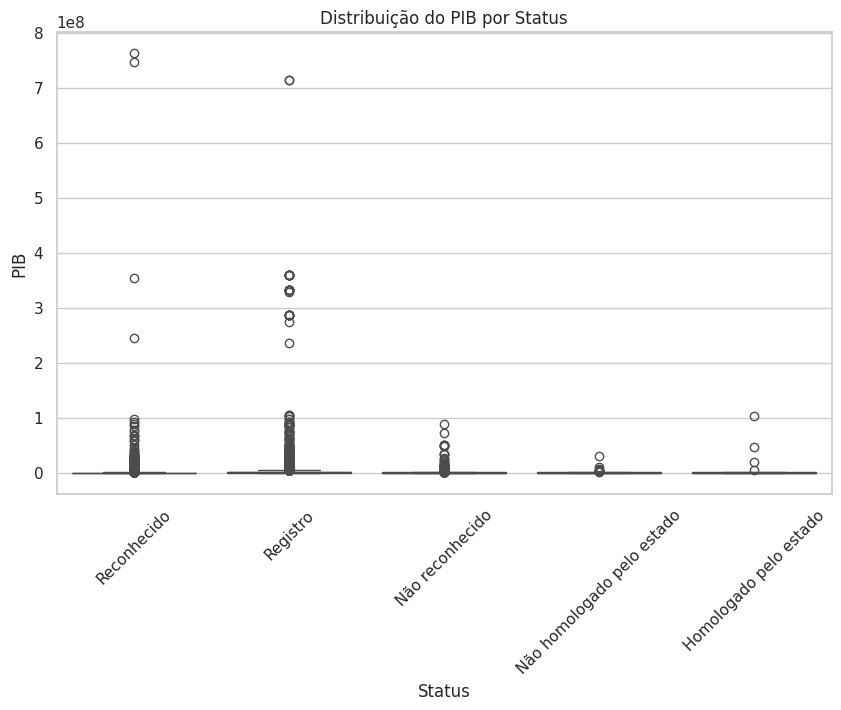

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Status', y='PIB', data=df_eventos, palette='deep', order=status_counts.index)
plt.title('Distribuição do PIB por Status')
plt.xlabel('Status')
plt.ylabel('PIB')
plt.xticks(rotation=45)
plt.show()

## Análise exploratória Reconhecido e Nao Reconhecido

In [ ]:
df_eventos_filtered = df_eventos[df_eventos['Status'].isin(['Reconhecido', 'Não reconhecido'])]

print("\nEstatísticas descritivas para os Status selecionados:")
display(df_eventos_filtered.describe())


Estatísticas descritivas para os Status selecionados:


,codigo_ibge,DH_MORTOS,DH_FERIDOS,DH_ENFERMOS,DH_DESABRIGADOS,DH_DESALOJADOS,DH_DESAPARECIDOS,DH_OUTROS AFETADOS,DH_total_danos_humanos,DM_Uni Habita Danificadas,...,PEPR_Serviços (R$),PEPR_total_privado,PE_PLePR,Empenhado,DensidadePop,Hab,Area,Ano,PIB,COBRADE
count,"18,346.00","18,346.00","18,346.00","18,346.00","18,346.00","18,346.00","18,346.00","18,346.00","18,346.00","18,346.00",...,"18,346.00","18,346.00","18,346.00","3,874.00","18,346.00","18,346.00","18,346.00","12,531.00","12,531.00","18,346.00"
mean,"3,151,875.46",0.06,2.05,35.36,28.71,150.91,0.05,"7,876.58","8,093.71",67.53,...,"257,060.75","15,757,756.77","17,180,375.06","1,430,746.18",78.76,"32,119.27","1,955.60","2,018.22","956,980.26","13,664.66"
std,"919,072.67",1.05,49.68,462.83,341.13,"1,139.68",3.06,"31,693.55","31,860.91",781.60,...,"7,121,982.47","124,550,166.98","125,625,744.93","5,109,620.26",403.39,"158,346.38","7,011.80",2.01,"10,877,228.71",972.87
min,"1,100,015.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.15,"1,010.00",3.56,"2,015.00","14,761.00","11,110.00"
25%,"2,506,905.00",0.00,0.00,0.00,0.00,0.00,0.00,620.00,814.50,0.00,...,0.00,0.00,"138,162.18","129,783.74",11.14,"5,812.00",218.59,"2,017.00","77,437.50","13,214.00"
50%,"2,929,800.00",0.00,0.00,0.00,0.00,0.00,0.00,"3,071.00","3,252.00",0.00,...,0.00,"1,830,779.90","2,892,670.31","364,817.70",22.51,"12,004.00",479.81,"2,018.00","165,416.00","14,110.00"
75%,"4,202,875.00",0.00,0.00,0.00,0.00,2.00,0.00,"7,800.00","8,000.00",0.00,...,0.00,"9,254,560.76","11,680,211.87","1,050,094.56",48.33,"24,626.00","1,244.40","2,020.00","411,622.00","14,110.00"
max,"5,300,108.00",78.00,"5,586.00","25,219.00","28,490.00","98,644.00",352.00,"2,100,000.00","2,100,000.00","35,000.00",...,"679,064,639.27","9,747,193,840.17","9,748,021,348.02","101,056,111.91","13,416.81","11,451,999.00","159,533.31","2,021.00","763,597,808.00","25,500.00"


In [ ]:
dh_cols = [col for col in df_eventos_filtered.columns if 'DH_' in col and col != 'DH_Descricao']
print("\nVariáveis de Danos Humanos:")
display(dh_cols)


Variáveis de Danos Humanos:


['DH_MORTOS',
 'DH_FERIDOS',
 'DH_ENFERMOS',
 'DH_DESABRIGADOS',
 'DH_DESALOJADOS',
 'DH_DESAPARECIDOS',
 'DH_OUTROS AFETADOS',
 'DH_total_danos_humanos']

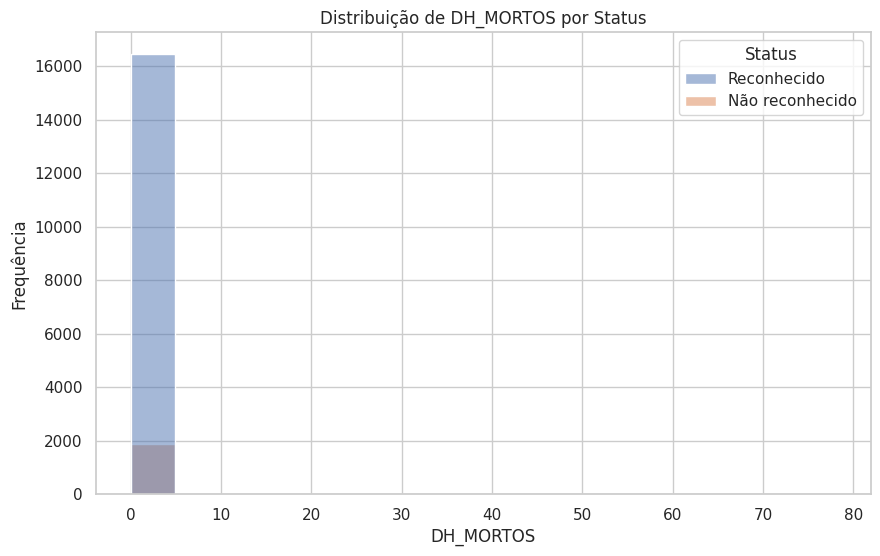

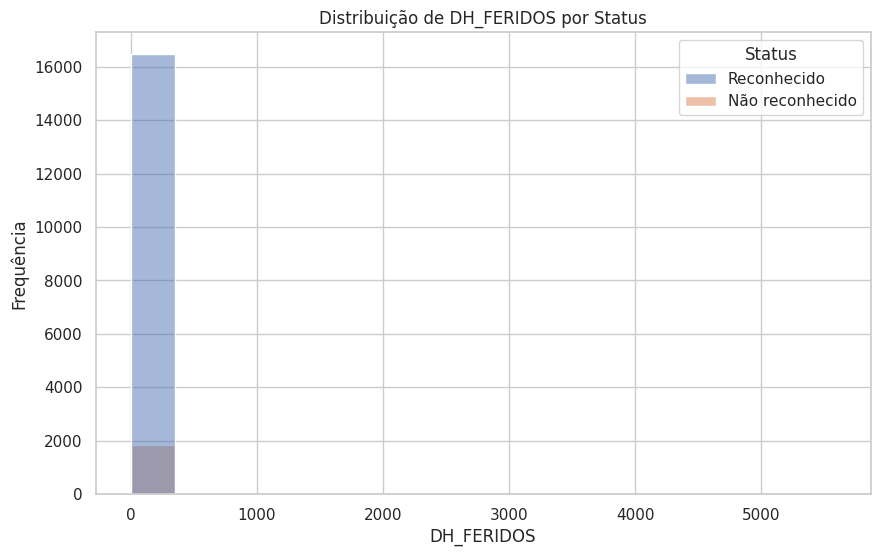

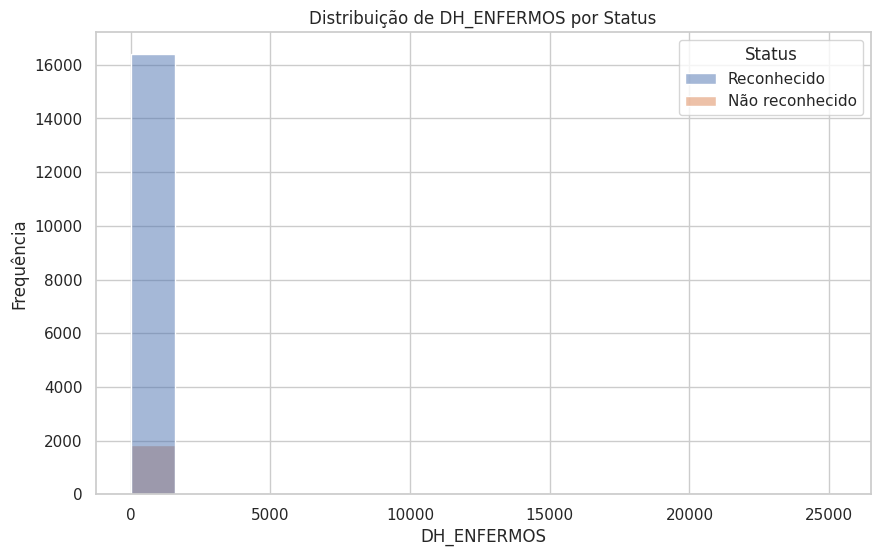

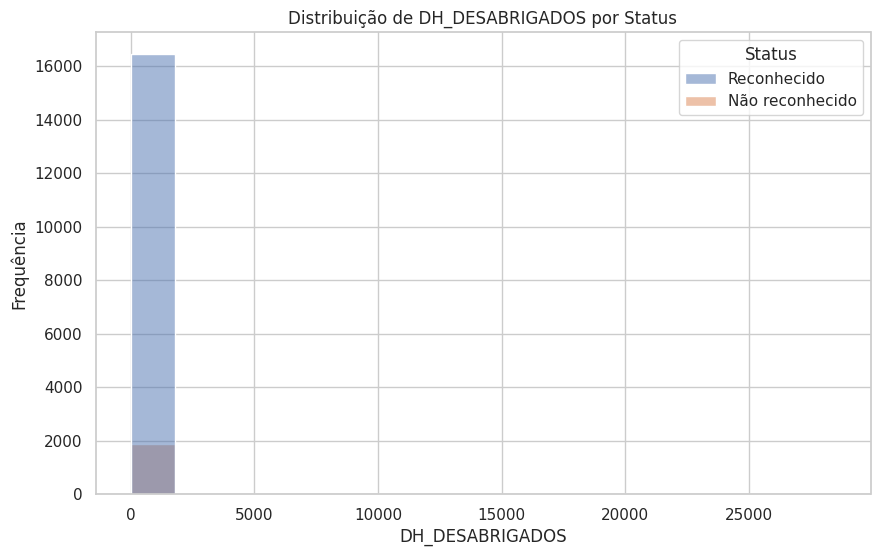

KeyboardInterrupt: 

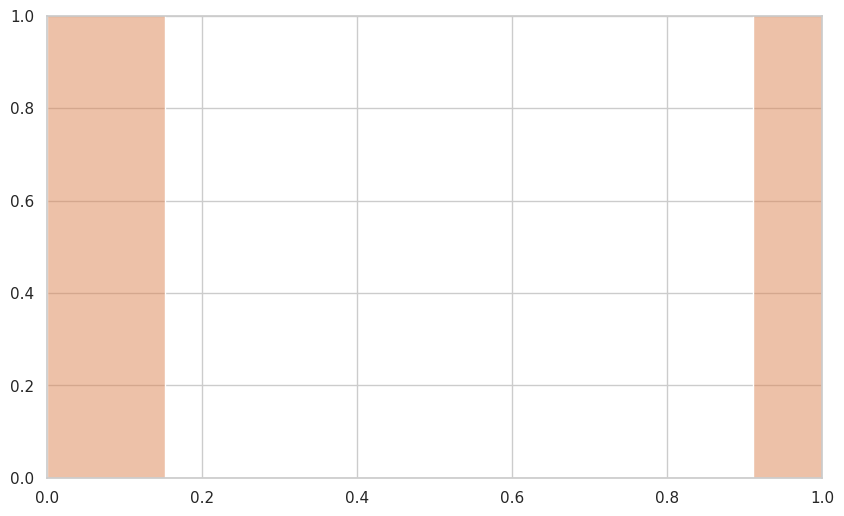

In [ ]:
for col in dh_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df_eventos_filtered, x=col, hue='Status', palette='deep')
    plt.title(f'Distribuição de {col} por Status')
    plt.xlabel(col)
    plt.ylabel('Frequência')
    plt.show()

In [ ]:
numeric_cols = df_eventos_filtered.select_dtypes(include=[np.number]).columns.tolist()
corr_matrix = df_eventos_filtered[numeric_cols].corr()

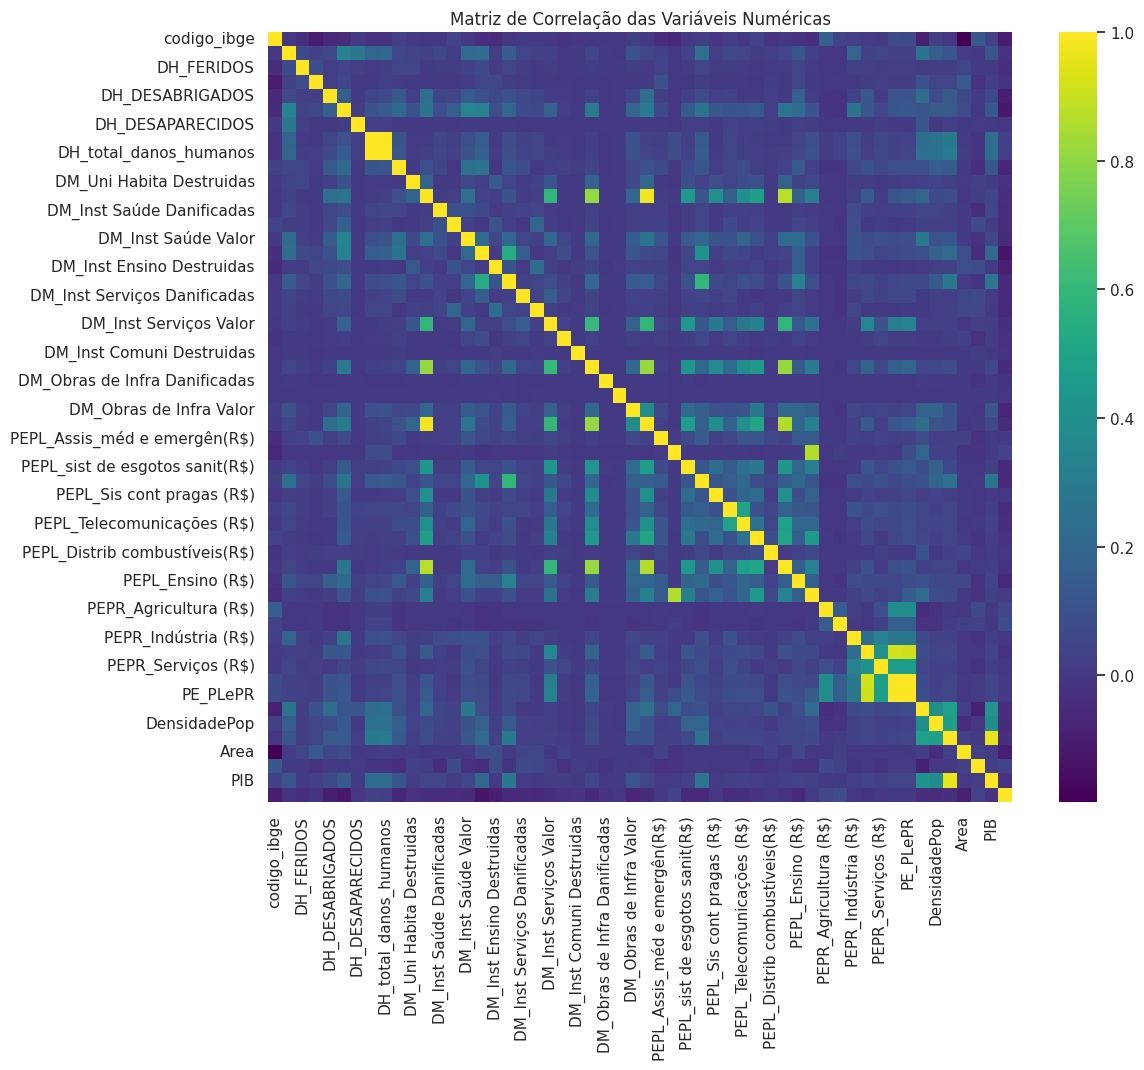

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='viridis', annot=False)
plt.title('Matriz de Correlação das Variáveis Numéricas')
plt.show()